# Target Scaling

In [14]:
x = np.random.uniform(low=5, high=20, size=100)
e = np.random.normal(loc=0, scale=0.5, size=100)

In [15]:
y = (x + e) ** 3 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


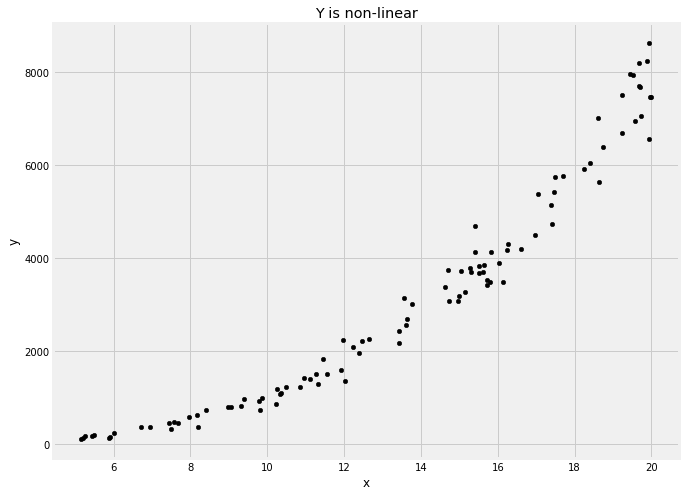

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

pd.DataFrame({'x': x, 'y': y}).plot(
    title='Y is non-linear',
    kind='scatter',
    x='x', y='y', 
    color='k', ax=ax
)

fig.show()

In [17]:
x = x.reshape((x.shape[0],1))

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [19]:
from sklearn.linear_model import Ridge

rgs = Ridge()
rgs.fit(x_train, y_train)
y_pred = rgs.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(
    'MAE={:.0f}, R2={:2f}'.format(
        mean_absolute_error(y_test, y_pred),
        r2_score(y_test, y_pred),
    )
)

MAE=704, R2=0.883232


In [21]:
class YTransformer:
    
    def __init__(self, power=1):
        self.power = power
        
    def fit(self, x, y):
        pass
    
    def transform(self, x, y):
        return x, np.power(y, self.power)
    
    def inverse_transform(self, x, y):
        return x, np.power(y, 1/self.power)
    
    
    def fit_transform(self, x, y):
        return self.transform(x, y)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for power in [1, 1/2, 1/3, 1/4, 1/5]:

    yt = YTransformer(power)
    _, y_train_t = yt.fit_transform(None, y_train)
    _, y_test_t = yt.transform(None, y_test)
    
    rgs = Ridge()

    rgs.fit(x_train, y_train_t)
    y_pred_t = rgs.predict(x_test)
    
    _, y_pred = yt.inverse_transform(None, y_pred_t)

    print(
        'Trasfomed y^{:.2f}: MAE={:.0f}, R2={:.2f}'.format(
            power,
            mean_absolute_error(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )

Trasfomed y^1.00: MAE=704, R2=0.88
Trasfomed y^0.50: MAE=378, R2=0.96
Trasfomed y^0.33: MAE=339, R2=0.96
Trasfomed y^0.25: MAE=359, R2=0.95
Trasfomed y^0.20: MAE=400, R2=0.93
